In [1]:
import pandas as pd
import numpy as np
import joblib 
import openpyxl
import sklearn
import seaborn as sns


In [32]:
import pandas as pd
import numpy as np

# 1. Define the column names manually (based on UCI documentation)
cols = [
    'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
    'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
    'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
    'abdominal_distension', 'nasogastric_tube', 'nasogastric_reflux',
    'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
    'packed_cell_volume', 'total_protein', 'abdom_appearance',
    'abdom_total_protein', 'outcome', 'surgical_lesion',
    'lesion_site', 'lesion_type', 'lesion_subtype', 'cp_data'
]

# 2. Load the data
# sep='\s+' tells pandas to use spaces as separators
# na_values='?' tells pandas to treat '?' as NaN (missing)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data"
horse_df = pd.read_csv(url, sep='\s+', names=cols, na_values='?')

# 3. Quick Sanity Check
horse_df.info()

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Owner\AppData\Local\Temp\ipykernel_39608\486473726.py:20: SyntaxWarning: invalid escape sequence '\s'
  horse_df = pd.read_csv(url, sep='\s+', names=cols, na_values='?')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    300 non-null    int64  
 2   hospital_number        300 non-null    int64  
 3   rectal_temp            240 non-null    float64
 4   pulse                  276 non-null    float64
 5   respiratory_rate       242 non-null    float64
 6   temp_of_extremities    244 non-null    float64
 7   peripheral_pulse       231 non-null    float64
 8   mucous_membrane        253 non-null    float64
 9   capillary_refill_time  268 non-null    float64
 10  pain                   245 non-null    float64
 11  peristalsis            256 non-null    float64
 12  abdominal_distension   244 non-null    float64
 13  nasogastric_tube       196 non-null    float64
 14  nasogastric_reflux     194 non-null    float64
 15  nasoga

In [39]:
surgery_med =  horse_df["surgery"].median()
horse_df["surgery"] = horse_df["surgery"].fillna(surgery_med)
horse_df["surgery"].isna().sum()

np.int64(0)

In [43]:
rectal_temp_med = horse_df["rectal_temp"].median()
horse_df["rectal_temp"] = horse_df["rectal_temp"].fillna(rectal_temp_med)
horse_df["rectal_temp"].isna().sum()

np.int64(0)

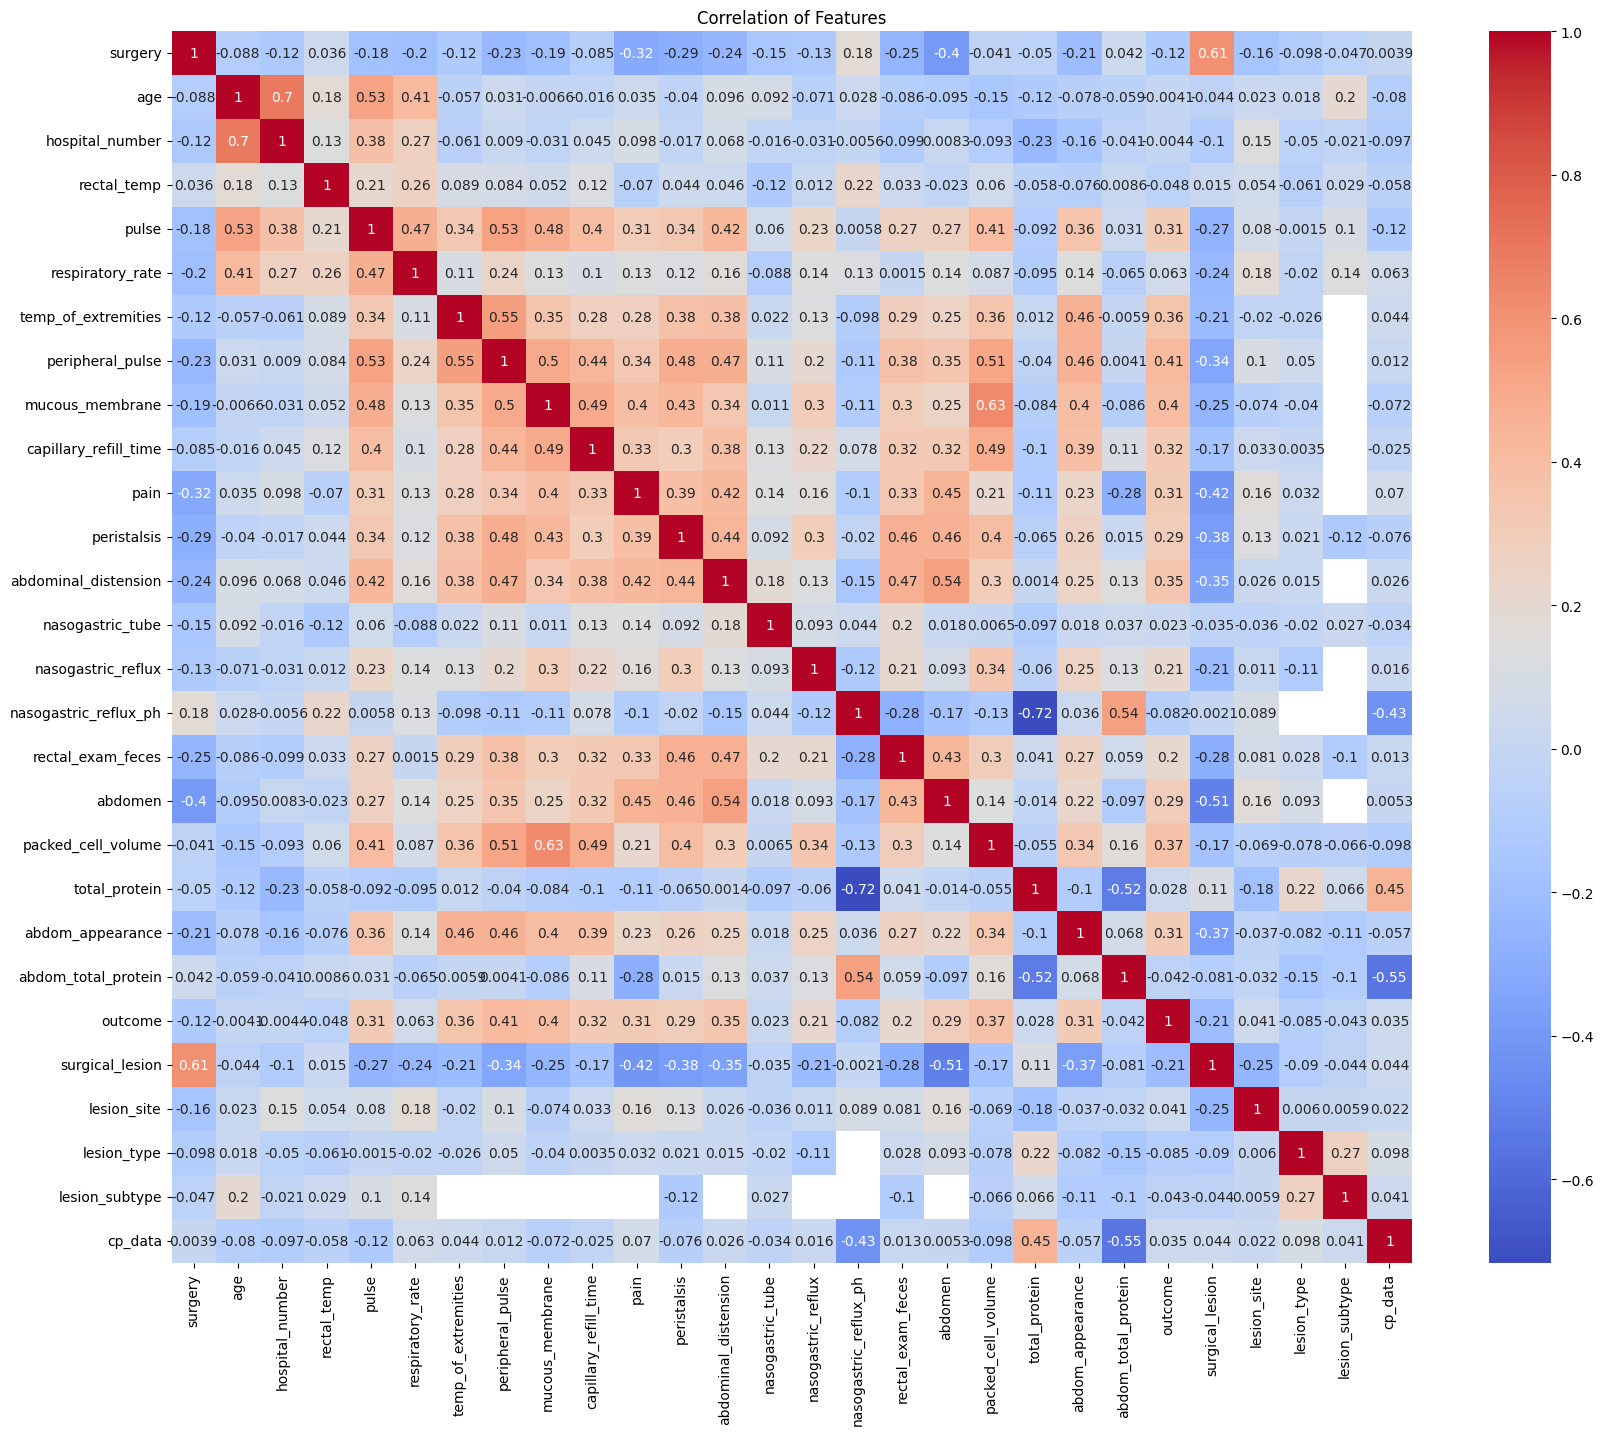

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(horse_df.corr(),annot=True, cmap="coolwarm")
plt.title("Correlation of Features")
plt.show()

In [54]:
horse_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdom_appearance,abdom_total_protein,outcome,surgical_lesion,lesion_site,lesion_type,lesion_subtype,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
